In [179]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [180]:
df = pd.read_csv('crop_recommendation.csv')

In [181]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,75,51,39,20.879744,82.002744,6.502985,202.935536,rice
1,76,57,42,21.770462,80.319644,7.038096,226.655537,rice
2,81,51,35,23.004459,82.320763,7.840207,263.964248,rice
3,62,39,39,26.491096,80.158363,6.980401,242.864034,rice
4,74,39,42,20.130175,81.604873,7.628473,262.717340,rice


In [182]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,108,26,28,26.774637,66.413269,6.780064,177.774507,coffee
2196,114,35,31,27.417112,56.636362,6.086922,127.924610,coffee
2197,85,31,26,24.131797,67.225123,6.362608,173.322839,coffee
2198,101,15,31,26.272418,52.127394,6.758793,127.175293,coffee
2199,96,39,29,23.603016,60.396475,6.779833,140.937041,coffee


In [183]:
df.size

17600

In [184]:
df.shape

(2200, 8)

In [185]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [186]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [187]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [188]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

<Axes: >

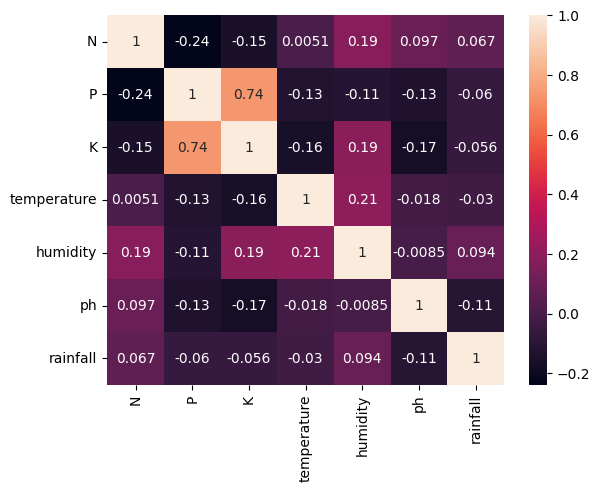

In [189]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)


### Seperating features and target label

In [190]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [191]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [192]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
print(Xtrain)

        N    P    K  temperature   humidity        ph    rainfall
1936  106   55   24    22.000851  79.472710  7.388266   90.422242
610    32   59   16    29.530376  86.733460  7.156563   59.872321
372    26   77   15    18.623288  23.024103  5.532101  135.337803
1559    7  134  196    23.641424  93.744615  6.155939  116.691218
1500    5  120  205    22.750888  90.694892  5.521467  110.431786
...   ...  ...  ...          ...        ...       ...         ...
1071   90   71   50    25.787498  84.511942  6.020445  114.200546
433    16   76   19    23.453790  46.487148  7.109598  150.871220
674     3   53   24    29.256493  81.979522  6.864839   42.024833
1099   81   93   49    29.507046  78.205856  5.507642   98.125658
1608   24   15    6    30.554726  90.903438  7.189260  106.071198

[1760 rows x 7 columns]


# Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  94.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.73      1.00      0.84        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.78      1.00      0.88        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.80      1.00      0.89        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.81      0.89        21
       mango       1.00      0.77      0.87        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [196]:
score

array([0.95681818, 0.91363636, 0.94090909, 0.90227273, 0.93409091])

### Saving trained Decision Tree model

In [197]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'C:\\Users\\Lenovo\\Downloads\\semester-1\\prac\\Models\\DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [198]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [199]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [200]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'C:\\Users\\Lenovo\\Downloads\\semester-1\\prac\\Models\\NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [201]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.89      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [202]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97727273, 0.97954545, 0.98863636, 0.98636364, 0.98636364])

In [203]:
#Saving trained SVM model

In [204]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'C:\\Users\\Lenovo\\Downloads\\semester-1\\prac\\Models\\SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9613636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.94      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.95      0.95      0.95        22
      cotton       0.86      0.95      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       1.00      0.96      0.98        23
       maize       0.81      0.81      0.81        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.95      0.95      0.95        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [206]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.97045455, 0.95227273, 0.94318182, 0.95909091, 0.95909091])

### Saving trained Logistic Regression model

In [207]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'C:\\Users\\Lenovo\\Downloads\\semester-1\\prac\\Models\\LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      0.95      0.95        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [209]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99090909, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Random Forest model

In [210]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'C:\\Users\\Lenovo\\Downloads\\semester-1\\prac\\Models\\RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [211]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Ytrain_encoded = le.fit_transform(Ytrain)
Ytest_encoded = le.transform(Ytest)  # Use same encoder for test labels
target_encoded = le.transform(target)  # Encode the entire target for cross-validation

In [212]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain_encoded)
predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest_encoded,predicted_values))

XGBoost's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.96      0.93      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      0.96      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.95      0.95      0.95        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00     

In [213]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target_encoded,cv=5)
score

array([0.98181818, 0.98863636, 0.99318182, 0.99318182, 0.99318182])

### Saving trained XGBoost model

In [214]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'C:\\Users\\Lenovo\\Downloads\\semester-1\\prac\\Models\\XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

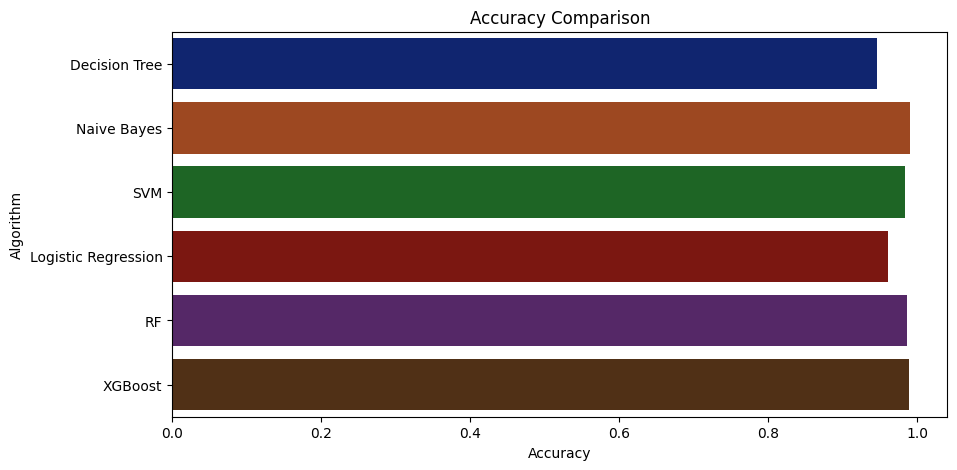

In [215]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [216]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9454545454545454
Naive Bayes --> 0.990909090909091
SVM --> 0.9840909090909091
Logistic Regression --> 0.9613636363636363
RF --> 0.9863636363636363
XGBoost --> 0.9886363636363636


## Making a prediction

In [217]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [218]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
